## Challenge 1:

In [11]:
#! pip install -q 'gwpy==3.0.8'
#! pip install -q 'gwosc==0.5.4'
#! pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


Duration of data:  127.999755859375 s
Sample rate of data:  4096.0 Hz
Simple plot in time-domain:


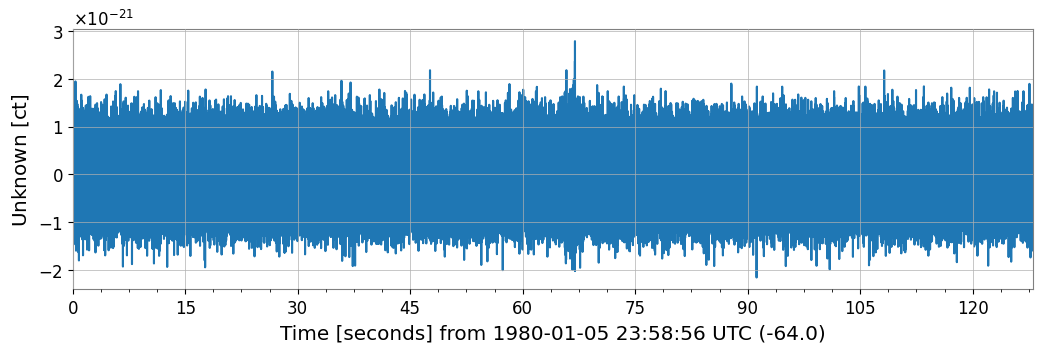

In [1]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.read('challenge1.gwf', channel='H1:CHALLENGE1')
#print(data)
print('Duration of data: ', data.times[-1]-data.times[0])
print('Sample rate of data: ', data.sample_rate)
#help(data)
%matplotlib inline
print('Simple plot in time-domain:')
plot = data.plot()



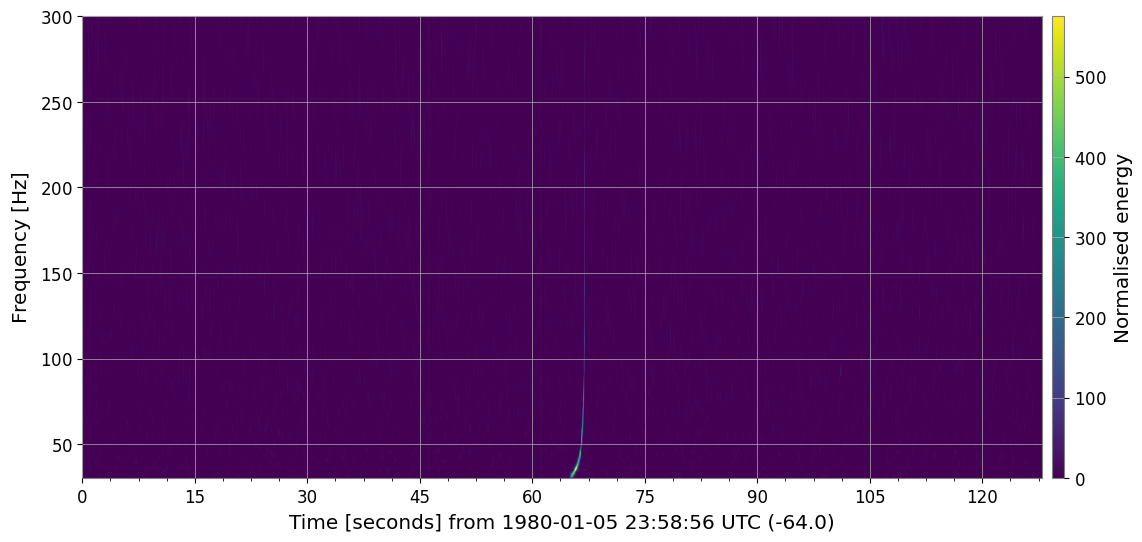

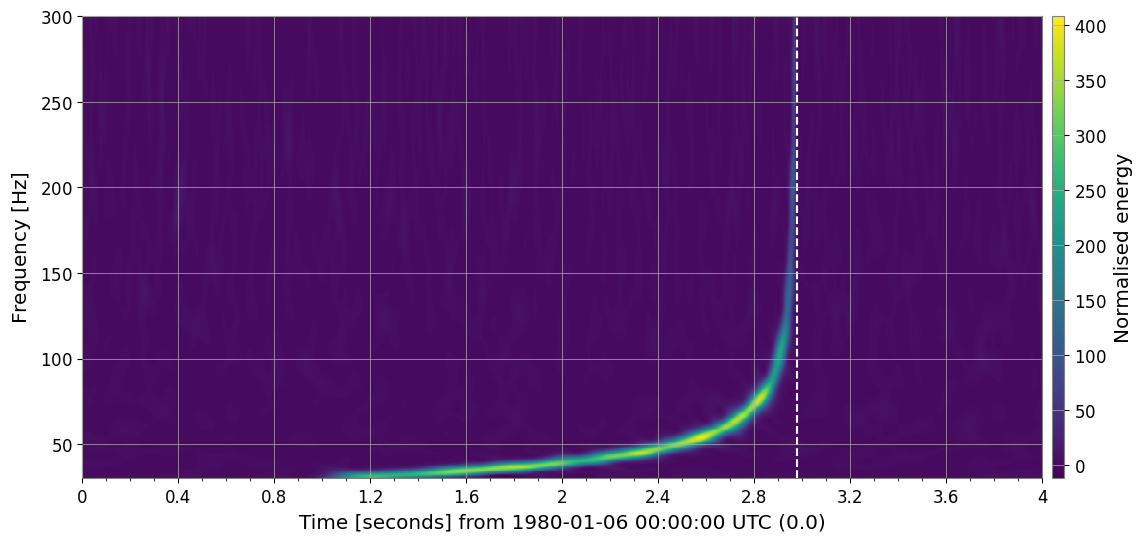

Merger seems to have happened roughly on 1980/01/06, at 00:00:02.98 UTC (2.98 seconds after midnight)


In [3]:
hq = data.q_transform(frange=(30, 300))
plot = hq.plot()
ax = plot.gca()
ax.colorbar(label="Normalised energy")

import matplotlib.pyplot as plt
hq2 = data.q_transform(frange=(30, 300), qrange=(10,25),outseg=(0,4))
plot2 = hq2.plot()
ax2 = plot2.gca()
ax2.colorbar(label="Normalised energy")
plt.axvline(x=2.98, color='white', linestyle='--')
plt.show()
print('Merger seems to have happened roughly on 1980/01/06, at 00:00:02.98 UTC (2.98 seconds after midnight)')


## Challenge 2:


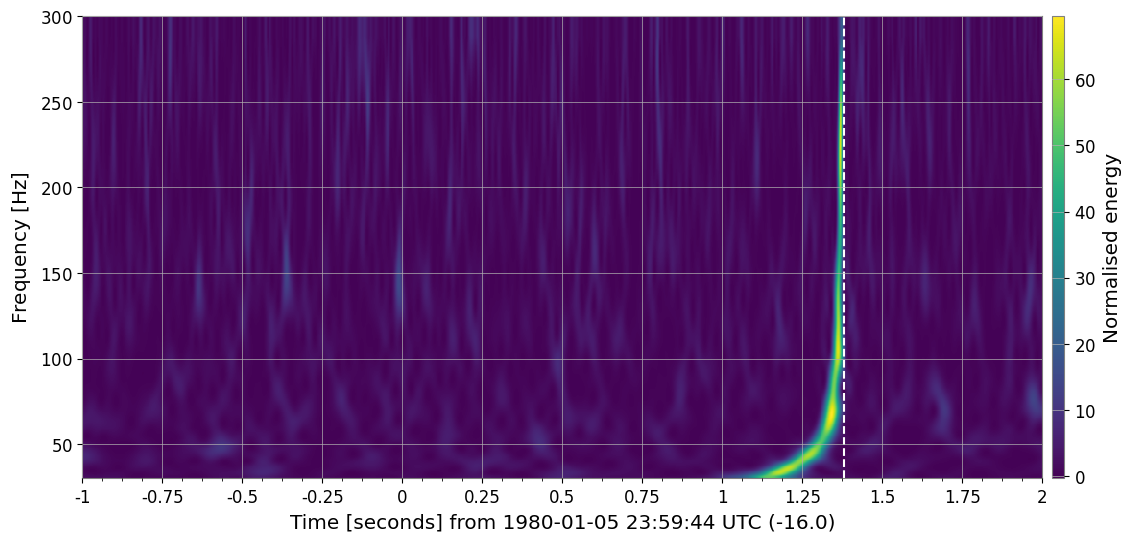

Merger seems to have happened roughly on 1980/01/05, at 23:59:45.38 UTC


In [4]:
from gwpy.timeseries import TimeSeries
data2 = TimeSeries.read('challenge2.gwf', channel='H1:CHALLENGE2')

import matplotlib.pyplot as plt
hq3 = data2.q_transform(frange=(30, 300), qrange=(10,25), outseg=(47-64,50-64))
plot3 = hq3.plot()
ax3 = plot3.gca()
ax3.colorbar(label="Normalised energy")
plt.axvline(x=-16+1.38, color='white', linestyle='--')
plt.show()
print('Merger seems to have happened roughly on 1980/01/05, at 23:59:45.38 UTC')


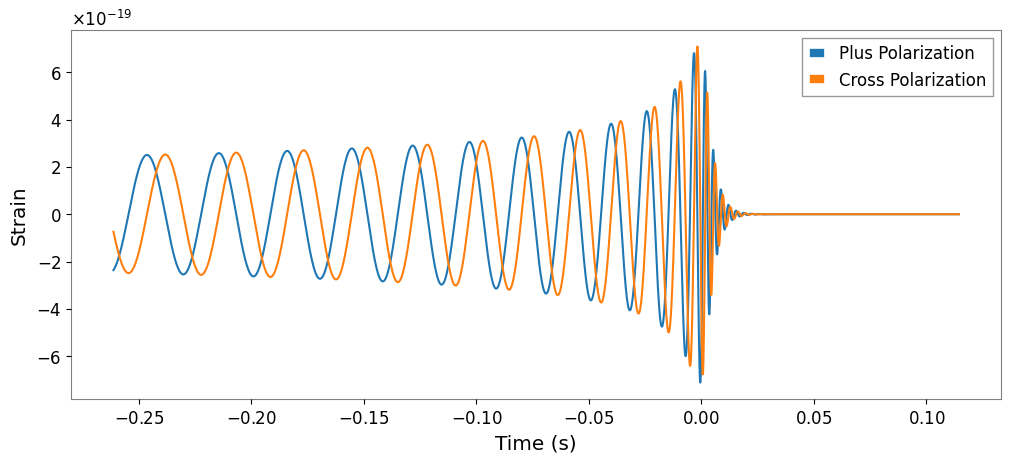

In [9]:
#! pip install -q pycbc
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

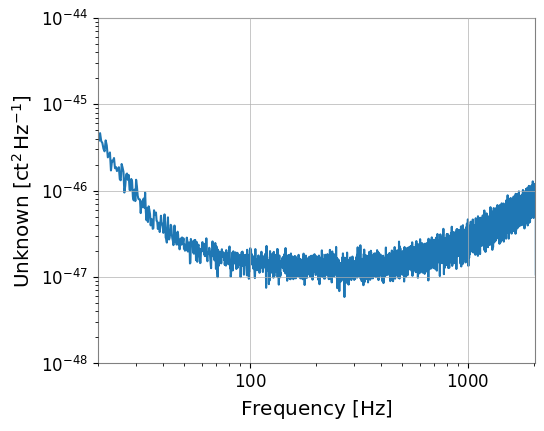

In [10]:
psd = data2.psd(fftlength=4, overlap=2, method="median")
plot3 = psd.plot(xscale='log', yscale='log', xlim=(20,2020), ylim=(10e-49, 10e-45))
plot3.show(warn=False)

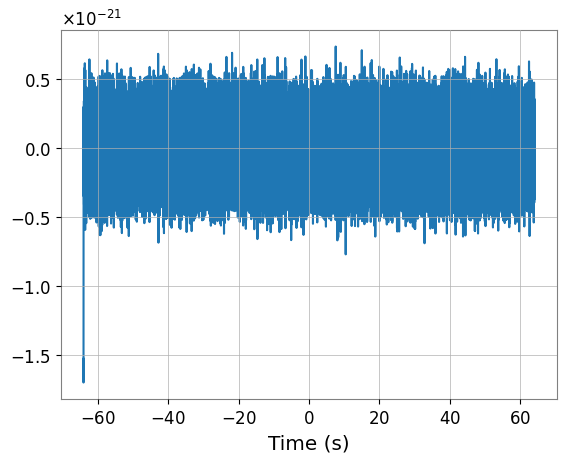

In [13]:
%matplotlib inline

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc import frame


#read data and make basic preparation with highpass and resampling (to 2048Hz) functions
strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()


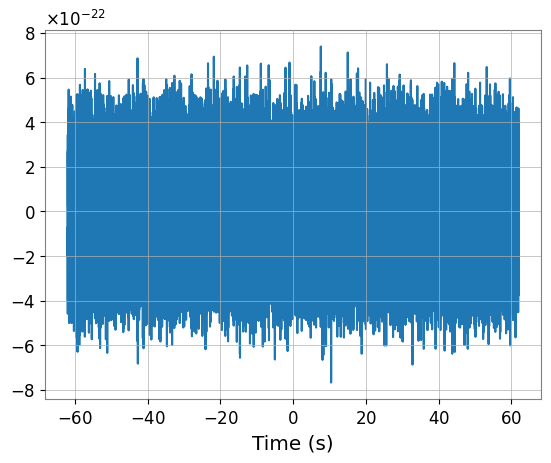

In [14]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [15]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density using 4-second samples in Welch method.

psd = conditioned.psd(4)

psd = interpolate(psd, conditioned.delta_f)

psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [16]:
from pycbc.waveform import get_td_waveform

m = 30 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match data
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

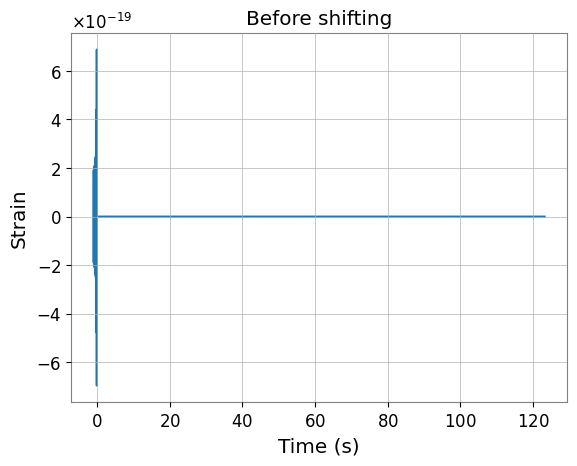

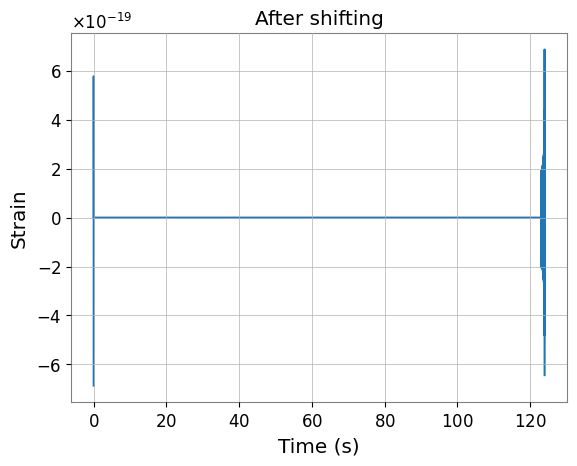

In [17]:
# Let's plot the signal before and after shifting. Shoifting process in preparation for use as template.

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

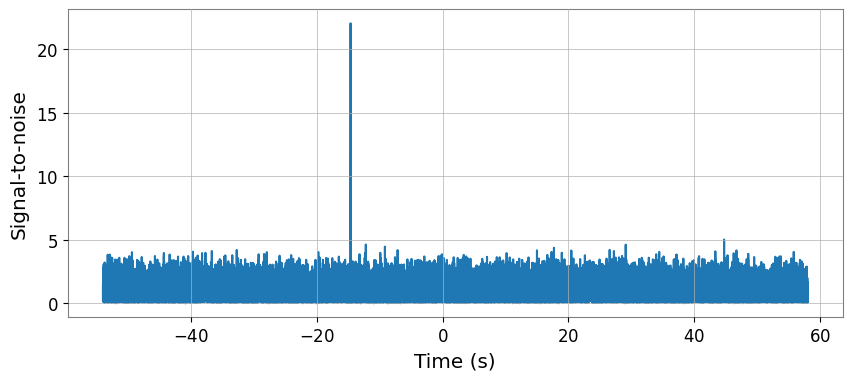

Found a signal at -14.6328125s with SNR 22.054545591712557


In [18]:
from pycbc.filter import matched_filter
import numpy

#Produce SNR analysis and plot it.
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Found a signal at {}s with SNR {}".format(time, abs(snrp)))